In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X,y = make_circles(n_samples=100 , noise = 0.1 , random_state=1)

<Axes: >

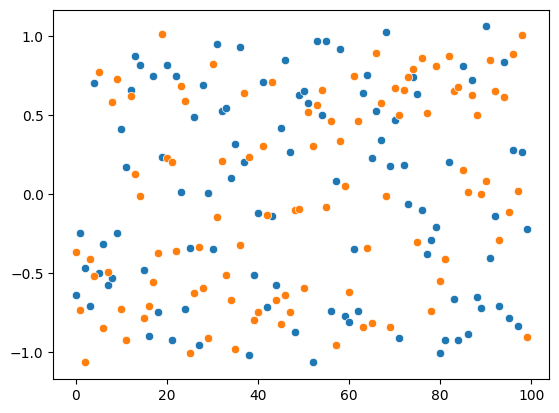

In [4]:
sns.scatterplot(X[:,0])
sns.scatterplot(X[:,1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256,input_dim = 2,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [8]:
history = model.fit(X_train,y_train , validation_data = (X_test,y_test),epochs=3500 , verbose=0)

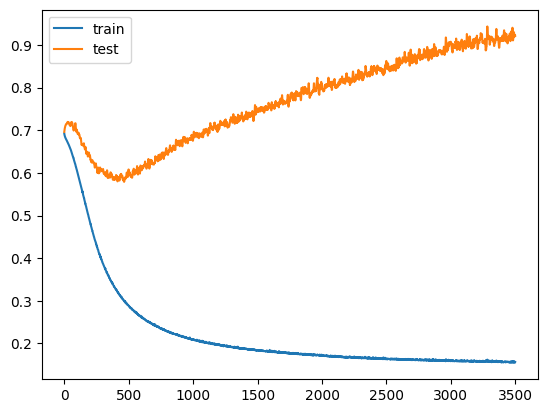

In [9]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()
#As you can see there is overfitting in this model due to too many epochs so we have to use earlystopping

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


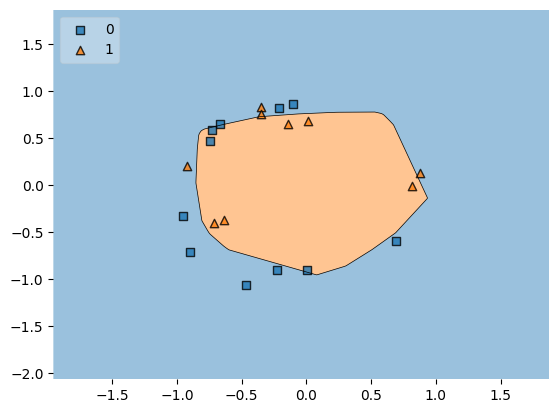

In [10]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

In [11]:
#Now we will implement early stopping to remove overfitting and get it to the perfect number of epochs
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [17]:
history1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6148 - loss: 0.6650 - val_accuracy: 0.3500 - val_loss: 0.7150
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6461 - loss: 0.6610 - val_accuracy: 0.4000 - val_loss: 0.7150
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5758 - loss: 0.6714 - val_accuracy: 0.4000 - val_loss: 0.7133
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6195 - loss: 0.6711 - val_accuracy: 0.4000 - val_loss: 0.7125
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6250 - loss: 0.6678 - val_accuracy: 0.4000 - val_loss: 0.7127
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6383 - loss: 0.6616 - val_accuracy: 0.5000 - val_loss: 0.7122
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6633 - loss: 0.6528 - val_accuracy: 0.4500 - val_loss: 0.7131
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5836 - loss: 0.6669 - val_accuracy: 0.5000 - v

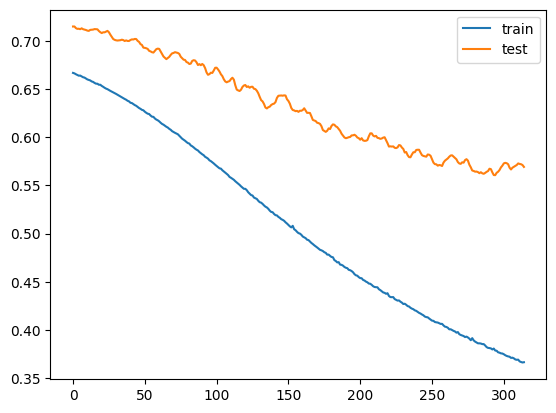

In [18]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='test')
plt.legend()
plt.show()